# Sesión 1 – Apartado 1: Entorno profesional y *Stack* habitual

**Objetivos:**
- Conocer el *stack* típico de ciencia de datos con Python.
- Preparar un entorno reproducible y una estructura de proyecto.
- Cargar un dataset y realizar una EDA inicial con gráficos sencillos.

## 1) Stack habitual

Usaremos las siguientes librerías:

- `pandas` para manipulación de datos
- `numpy` para operaciones numéricas
- `scikit-learn` para *ML* y *pipelines*
- `matplotlib` para visualización básica
- `seaborn` (opcional) para visualizaciones de alto nivel

💡 Recomendación: usar un entorno virtual (conda/venv) y un fichero `requirements.txt`.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print('Python:', sys.version)
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('matplotlib:', plt.matplotlib.__version__)
print('seaborn:', sns.__version__)
print('scikit-learn:', sklearn.__version__)

Python: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
numpy: 2.3.3
pandas: 2.3.2
matplotlib: 3.10.6
seaborn: 0.13.2
scikit-learn: 1.7.2


## 2) NumPy en 5 minutos (antes de cargar datos)
NumPy es la base numérica de Python y `pandas` se apoya en él. Conceptos clave:
- Arrays `ndarray` (homogéneos y vectorizados)
- Indexado, slicing y máscaras booleanas
- Broadcasting (operaciones entre arrays de diferentes formas compatibles)
- Agregaciones rápidas (`mean`, `sum`, etc.)
- Álgebra lineal básica (`dot`, `matmul`, `inv`, `eig`)

Debajo tienes ejemplos rápidos que puedes ejecutar.

In [ ]:
# Crear arrays y formas
A = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([10, 20, 30])
print("A shape:", A.shape, "b shape:", b.shape)

# Slicing e indexado
print("A[0, 1] =", A[0, 1])
print("Primera fila:", A[0])
print("Última columna:", A[:, -1])

# Máscara booleana
mask = A % 2 == 0
print("Máscara pares:\n", mask)
print("Elementos pares:", A[mask])

# Broadcasting (suma vector b a cada fila de A)
C = A + b
print("C = A + b ->\n", C)

# Agregaciones
print("Media por columnas:", A.mean(axis=0))
print("Suma por filas:", A.sum(axis=1))

# Álgebra lineal
x = np.array([1.0, 0.5, -1.0])
Ax = A @ x  # matmul
print("A @ x =", Ax)

M = np.array([[2.0, 0.5], [0.5, 1.0]])
Minv = np.linalg.inv(M)
print("M^{-1} =\n", Minv)

vals, vecs = np.linalg.eig(M)
print("Autovalores:", vals)
print("Autovectores:\n", vecs)

A shape: (2, 3) b shape: (3,)
A[0, 1] = 2
Primera fila: [1 2 3]
Última columna: [3 6]
Máscara pares:
 [[False  True False]
 [ True False  True]]
Elementos pares: [2 4 6]
C = A + b ->
 [[11 22 33]
 [14 25 36]]
Media por columnas: [2.5 3.5 4.5]
Suma por filas: [ 6 15]
A @ x = [-1.   0.5]
M^{-1} =
 [[ 0.57142857 -0.28571429]
 [-0.28571429  1.14285714]]
Autovalores: [2.20710678 0.79289322]
Autovectores:
 [[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


## 3) Carga de datos

Usaremos un dataset sintético tipo *Titanic*, ya guardado en `data/raw/mini_titanic.csv`.
Incluye columnas numéricas y categóricas con valores nulos para practicar imputación y codificación.

In [2]:
df = pd.read_csv('../data/raw/mini_titanic.csv')
df.head()

,sex,class,age,fare,survived
0,male,Third,34.352706,119.00,0
1,female,Second,50.654987,66.77,0
2,male,First,42.007235,21.87,0
3,male,Second,27.760861,NaN,0
4,male,Third,29.733773,212.45,0


## 4) Auditoría rápida de calidad de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       300 non-null    object 
 1   class     285 non-null    object 
 2   age       265 non-null    float64
 3   fare      280 non-null    float64
 4   survived  300 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB


In [4]:
df.describe(include='all')

,sex,class,age,fare,survived
count,300,285,265.000000,280.000000,300.000000
unique,2,3,NaN,NaN,NaN
top,male,Third,NaN,NaN,NaN
freq,151,155,NaN,NaN,NaN
mean,NaN,NaN,29.755908,38.931250,0.213333
std,NaN,NaN,14.370522,34.615436,0.410346
min,NaN,NaN,0.000000,3.250000,0.000000
25%,NaN,NaN,19.166951,17.390000,0.000000
50%,NaN,NaN,30.073412,29.120000,0.000000
75%,NaN,NaN,39.161119,46.772500,0.000000


In [5]:
# Conteo de nulos por columna
df.isna().sum().sort_values(ascending=False)

age         35
fare        20
class       15
sex          0
survived     0
dtype: int64

In [ ]:
# Filtrado: pasajeros adultos (age >= 18)
adultos = df[df["age"] >= 18]
print("Adultos:", len(adultos))

# Nueva columna: relación fare/age (evita división por cero y nulos)
df["fare_per_age"] = (df["fare"] / df["age"]).replace([np.inf, -np.inf], np.nan)

# GroupBy: tasa media de supervivencia por sexo y clase
survival_by_group = df.groupby(["sex", "class"])["survived"].mean().reset_index()
print("\nTasa media de supervivencia por sexo y clase:")
print(survival_by_group.head())

# Ordenación: top 5 por fare
top5_fare = df.sort_values("fare", ascending=False).head()
print("\nTop 5 por fare:")
print(top5_fare[["sex", "class", "age", "fare", "survived"]])

## 5) Visualizaciones rápidas (matplotlib)

In [ ]:
# Ejemplos de gráficos listos para ejecutar

# Scatter con línea de tendencia simple (regplot)
plt.figure(figsize=(6,4))
sns.regplot(x='age', y='fare', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relación entre edad y tarifa (regresión lineal)')
plt.show()

# Heatmap de correlaciones numéricas
plt.figure(figsize=(6,5))
corr = df.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación (numéricas)')
plt.show()

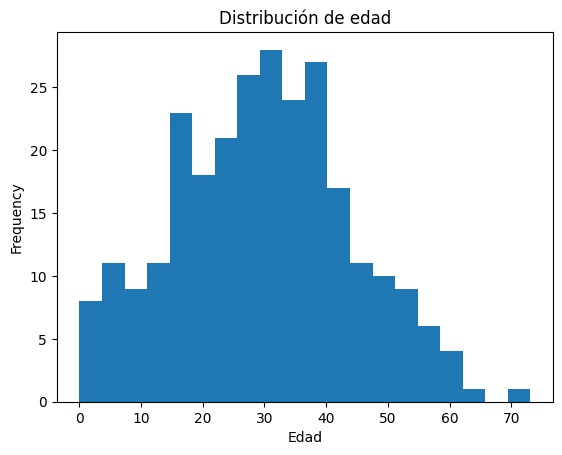

In [6]:
# Histograma de edades
plt.figure()
df['age'].plot(kind='hist', bins=20, title='Distribución de edad')
plt.xlabel('Edad')
plt.show()

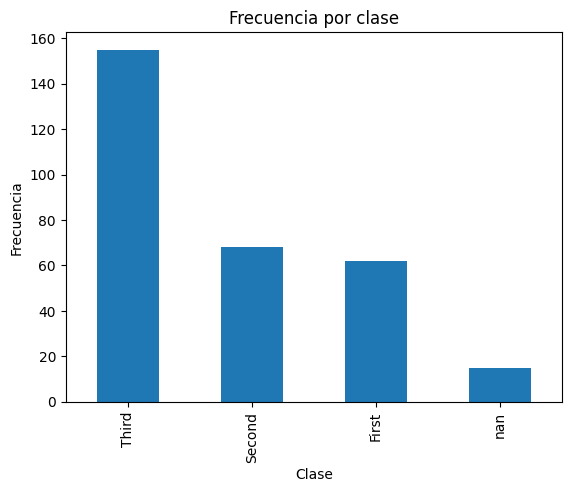

In [7]:
# Conteo por clase (First/Second/Third)
plt.figure()
df['class'].value_counts(dropna=False).plot(kind='bar', title='Frecuencia por clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

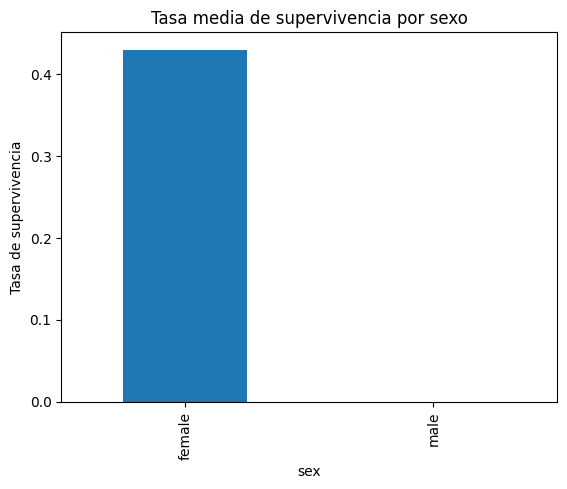

In [8]:
# Supervivencia por sexo (media de survived por categoría)
plt.figure()
df.groupby('sex')['survived'].mean().plot(kind='bar', title='Tasa media de supervivencia por sexo')
plt.ylabel('Tasa de supervivencia')
plt.show()

## 6) Visualizaciones complejas (seaborn)

In [9]:
# Seaborn - configuración visual y ejemplos rápidos
sns.set_style('whitegrid')
sns.set_palette('Set2')
# Nota: si el dataset tiene pocos registros, algunos plots pueden quedar simples

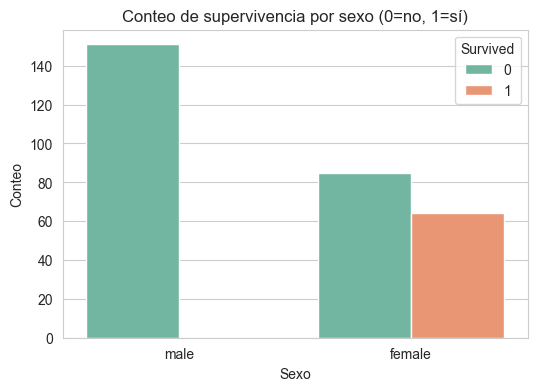

In [10]:
# Ejemplo 1: countplot de supervivencia por sexo
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Conteo de supervivencia por sexo (0=no, 1=sí)')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.legend(title='Survived')
plt.show()

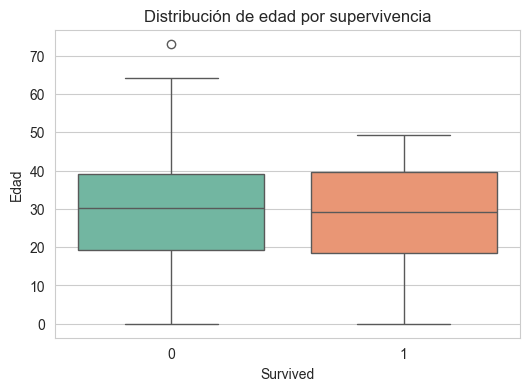

In [11]:
# Ejemplo 2: boxplot de edad por supervivencia
plt.figure(figsize=(6,4))
sns.boxplot(x='survived', y='age', data=df, palette='Set2', hue='survived', legend=False)
plt.title('Distribución de edad por supervivencia')
plt.xlabel('Survived')
plt.ylabel('Edad')
plt.show()

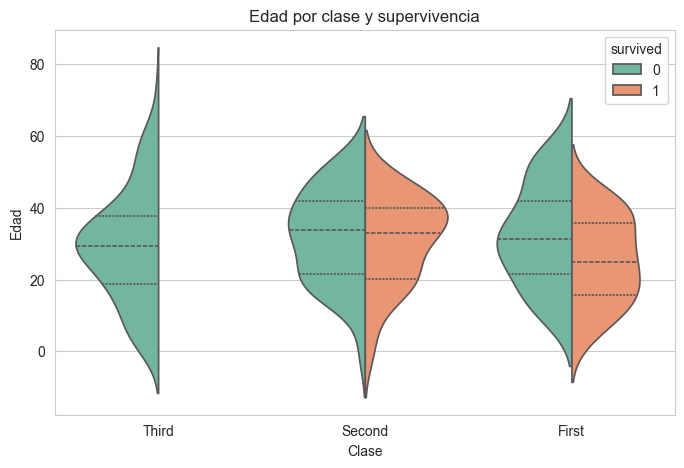

In [12]:
# Ejemplo 3: violinplot de edad por clase y supervivencia (siempre que haya registros suficientes)
plt.figure(figsize=(8,5))
# 'class' es una columna categórica del dataset; usamos 'survived' para hue (0/1)
sns.violinplot(x='class', y='age', hue='survived', data=df, split=True, inner='quartile', palette='Set2')
plt.title('Edad por clase y supervivencia')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

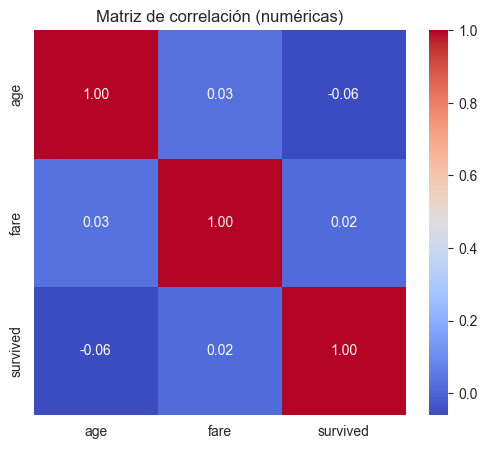

In [13]:
# Ejemplo 4: mapa de calor de correlaciones entre variables numéricas
plt.figure(figsize=(6,5))
corr = df.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación (numéricas)')
plt.show()

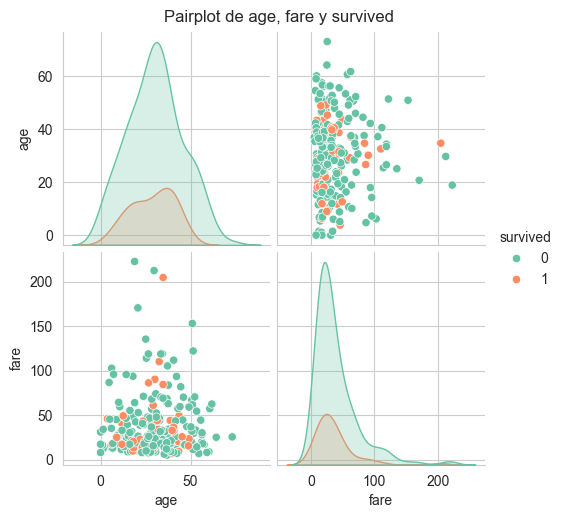

In [14]:
# Ejemplo 5: pairplot rápido para variables seleccionadas
# Selecciona columnas numéricas pequeñas para evitar sobrecarga
cols = ['age', 'fare', 'survived']
sns.pairplot(df[cols].dropna(), hue='survived', diag_kind='kde', palette='Set2')
plt.suptitle('Pairplot de age, fare y survived', y=1.02)
plt.show()